Functions

In [2]:
import pandas as pd
import numpy as np
import umap
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot

Table D: zonation data

In [59]:
#zonation matrix 
zm = pd.read_csv("C:/Users/plfab/Documents/Mines/BIO520/Code_spatial_reconstruction_enterocytes/table_D_zonation_reconstruction.tsv", sep='\t')

#gets just the data columns
data_df = zm.filter(regex='V._mean')
data_df = data_df.astype(float)

#build model
reducer = umap.UMAP()
scaler  = sklearn.preprocessing.StandardScaler()
data    = scaler.fit_transform(data_df)

embedding = reducer.fit(data)
coord_df  = pd.DataFrame(embedding.embedding_, columns=['X','Y'])

,V1_mean,V2_mean,V3_mean,V4_mean,V5_mean,V6_mean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
27993,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
27994,0.000060,0.000060,0.000037,0.000057,0.000102,0.000075
27995,0.000045,0.000042,0.000041,0.000036,0.000040,0.000032
27996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


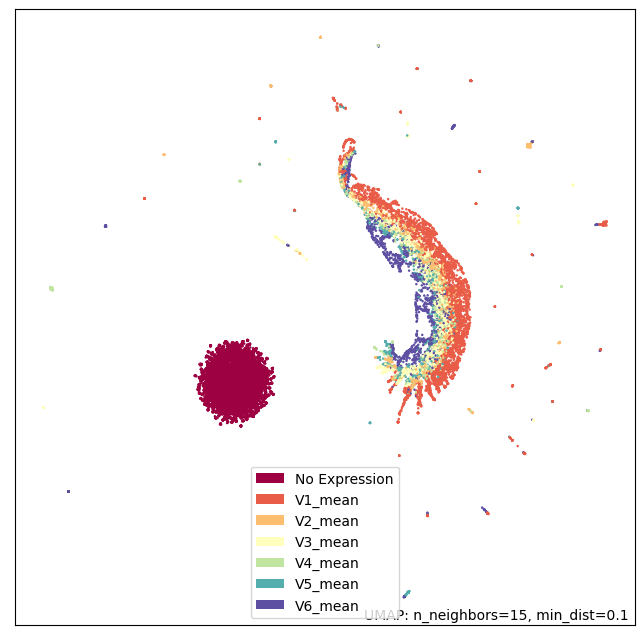

In [86]:
data_df['total'] = data_df[[f for f in data_df.columns if 'V' in f]].sum(axis=1)
data_df.loc[data_df['total'] <= 10e-10, 'highest'] = 'No Expression'
data_df.loc[data_df['total'] >= 10e-10, 'highest'] = data_df[[f for f in data_df.columns if 'V' in f]].idxmax(axis=1)

umap.plot.points(embedding, labels=data_df['highest'])
plt.show()

Table C: tSNE reconstruction

In [8]:
tsne_df = pd.read_csv('./table_C_scRNAseq_tsne_coordinates_zones.tsv', sep='\t')
tsne_df


,cell_id,tSNE_coordinate_1,tSNE_coordinate_2,zone
0,AAACCTGGTAAGTTCC,12.518369,-16.735935,V3
1,AAACGGGCACCAACCG,-3.619842,-5.642620,V5
2,AAACGGGTCACTGGGC,13.622892,16.828087,V1
3,AAAGATGGTGGACGAT,15.653014,3.311508,V2
4,AAAGATGGTTCGGGCT,6.754220,20.791256,V1
...,...,...,...,...
1378,TTTATGCGTTGAGGTG,16.721771,9.027939,V1
1379,TTTCCTCTCCCGACTT,-8.648628,-14.039106,V5
1380,TTTGCGCTCAAGATCC,-7.619734,-23.549410,V5
1381,TTTGGTTCAAAGCAAT,-5.692514,-1.399687,V4


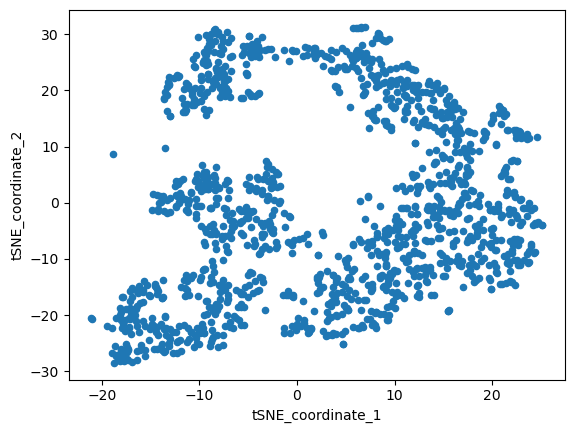

In [9]:
tsne_df.plot.scatter(x='tSNE_coordinate_1', y='tSNE_coordinate_2')
plt.show()
#needs more elegant plot, with "zone" column added as color hue
#What other filters could be intersting for this?? 

Table B: Observed transcription data vs Cells for each gene

In [11]:
rnaseq = pd.read_csv("./table_B_scRNAseq_UMI_counts.tsv", sep='\t') #UMI is number of observed transcripts
data_df = rnaseq.drop('gene', axis=1)
data_df = data_df.astype(float)
data_df
rnaseq


,gene,AAACCTGGTAAGTTCC,AAACGGGCACCAACCG,AAACGGGTCACTGGGC,AAAGATGGTGGACGAT,AAAGATGGTTCGGGCT,AAAGCAAAGCTGAAAT,AAAGCAACATGGTCAT,AAAGTAGGTTGTGGAG,AAATGCCAGACGCAAC,...,TTGGCAACATCGATTG,TTGTAGGGTAAGGGCT,TTTACTGAGCTGAACG,TTTACTGAGTCTCAAC,TTTACTGCAGTCGTGC,TTTATGCGTTGAGGTG,TTTCCTCTCCCGACTT,TTTGCGCTCAAGATCC,TTTGGTTCAAAGCAAT,TTTGGTTTCAAAGTAG
0,Xkr4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gm1992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gm37381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rp1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rp1.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,AC168977.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27994,PISD,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,0,1,2
27995,DHRSX,1,0,2,0,0,0,1,0,0,...,1,2,0,0,0,0,0,0,0,0
27996,Vmn2r122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# collect only the rows where expression exists for a gene
sums    = data_df.sum(axis=1)
expr_df = data_df[sums != 0]

#build model
reducer = umap.UMAP()
scaler  = sklearn.preprocessing.StandardScaler()
data    = scaler.fit_transform(expr_df)

embedding        = reducer.fit(data)
rnaseq_coord_df  = pd.DataFrame(embedding.embedding_, columns=['X','Y'])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


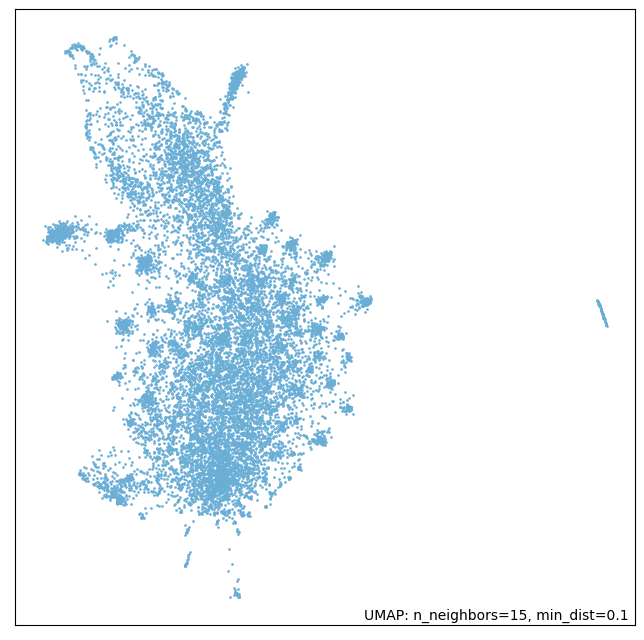

In [5]:
#Need to add location data / other data to rnaseq dataframe and plot this on the UMAP projection Below

# what are the clusters? 

umap.plot.points(embedding)
plt.show()

In [ ]:
# get dataframe with cells X gene expression
# create method to map location to this dataframe